In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame
plt.style.use("seaborn-v0_8")

In [3]:
#https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/
df_mat = pd.read_csv('student-mat.csv') # math course
df_por = pd.read_csv('student-por.csv') # portuguease language course
df_both = pd.concat([df_mat, df_por])

In [4]:
df_both.info()

# FEATURES: grades (G1-G3), absences, age, parents edu (Medu, Fedu), parents status (Pstatus - T together, A - apart), study time, class
# failures, internet access (Y or N), goout (how often, 1-5), health (1-5)
# TARGET: Talc

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [5]:
new_parent_status = pd.get_dummies(df_both["Pstatus"], dtype=int, drop_first=True)
df_both["Pstatus"] = new_parent_status

new_internet = pd.get_dummies(df_both["internet"], dtype=int, drop_first=True)
df_both["internet"] = new_internet

df_both["Talc"] = df_both["Dalc"] + df_both["Walc"]
df_both = df_both[["G1", "G2", "G3", "absences", "age", "Medu", "Fedu", "Pstatus", "studytime", "failures", "internet", "goout", "health", "Talc"]]
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         1044 non-null   int64
 1   G2         1044 non-null   int64
 2   G3         1044 non-null   int64
 3   absences   1044 non-null   int64
 4   age        1044 non-null   int64
 5   Medu       1044 non-null   int64
 6   Fedu       1044 non-null   int64
 7   Pstatus    1044 non-null   int64
 8   studytime  1044 non-null   int64
 9   failures   1044 non-null   int64
 10  internet   1044 non-null   int64
 11  goout      1044 non-null   int64
 12  health     1044 non-null   int64
 13  Talc       1044 non-null   int64
dtypes: int64(14)
memory usage: 122.3 KB


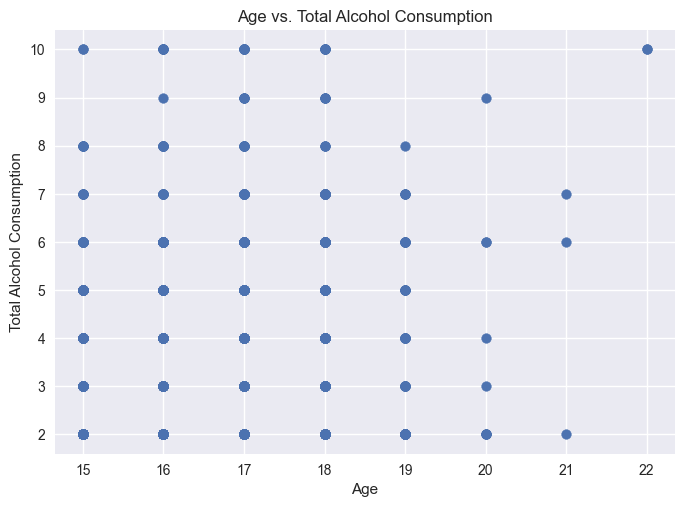

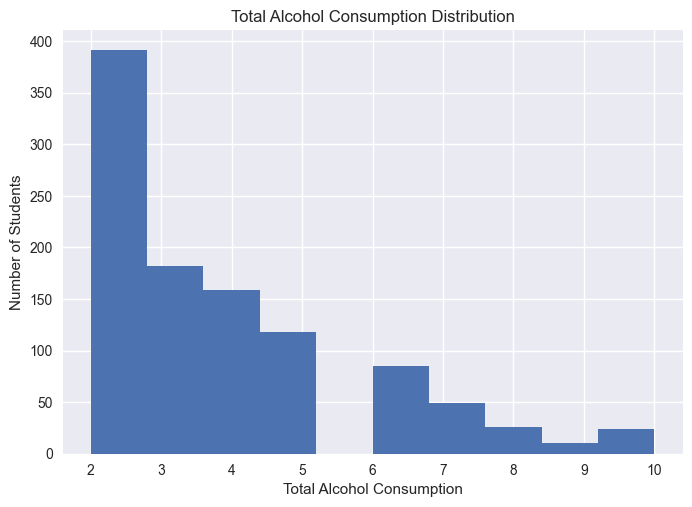

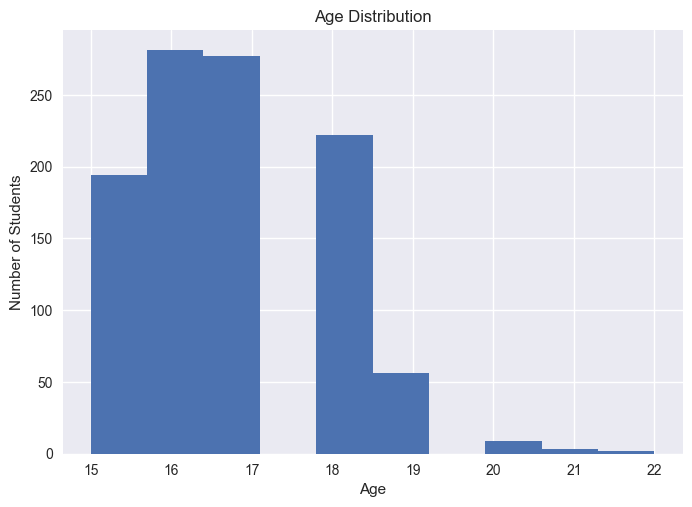

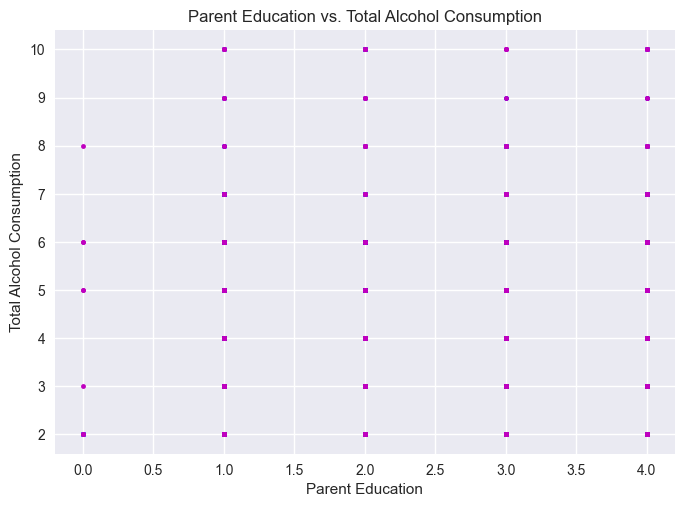

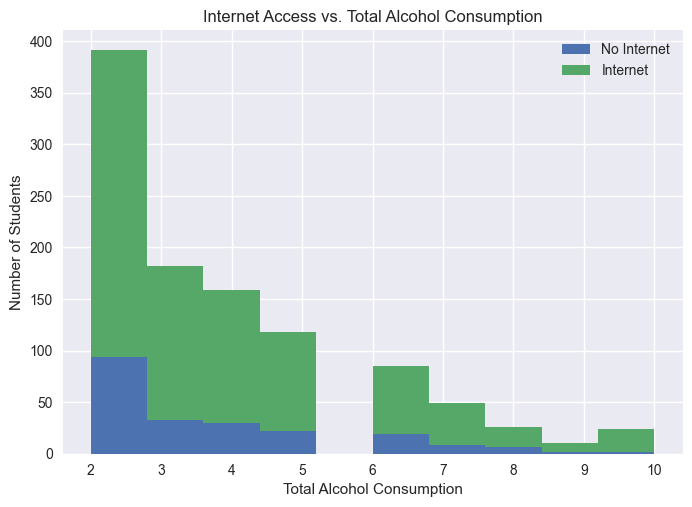

In [31]:
plt.scatter(df_both['age'], df_both['Talc'])
plt.title('Age vs. Total Alcohol Consumption')
plt.xlabel('Age')
plt.ylabel('Total Alcohol Consumption')
plt.show()


plt.hist(df_both['Talc'], bins=10)
plt.title('Total Alcohol Consumption Distribution')
plt.xlabel('Total Alcohol Consumption')
plt.ylabel('Number of Students')
plt.show()

plt.hist(df_both['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()


plt.plot(df_both['Fedu'], df_both['Talc'], 'b.', df_both['Medu'], df_both['Talc'], 'm.')
plt.title('Parent Education vs. Total Alcohol Consumption')
plt.xlabel('Parent Education')
plt.ylabel('Total Alcohol Consumption')
plt.show()

internet = df_both[df_both["internet"]>0]
no_internet = df_both[df_both["internet"]<1]
plt.hist([no_internet["Talc"], internet["Talc"]], bins=10, stacked=True, histtype="bar", label=["No Internet", "Internet"])
plt.title('Internet Access vs. Total Alcohol Consumption')
plt.xlabel('Total Alcohol Consumption')
plt.ylabel('Number of Students')
plt.legend()
